# Predict sale prices for housing

## 1. Import the library and dataset

### 1.1 Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
import warnings
warnings.filterwarnings('ignore')

### 1.2 Import Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Let we check the columns in this data set
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
#check the response variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

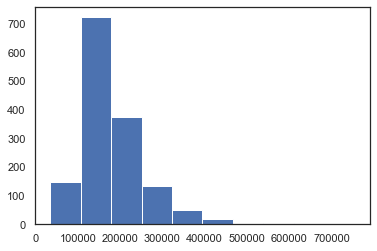

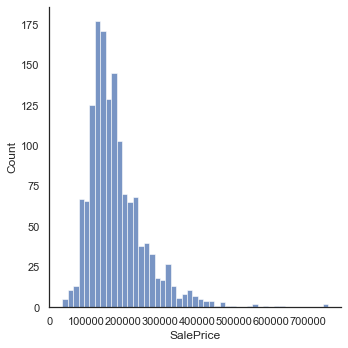

In [61]:
#Histogram of sales price
plt.hist(train['SalePrice'])
plt.plot()

sns.displot(train['SalePrice']);

## 2. Data Preprocessing

Because this dataset contains 81 variables, so we need to filter the less-correlated variable

### 2.1 Remove the NA values

In [62]:
#first we check the na value in this dataset
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [63]:
# drop all the variable contains na value
train=train.dropna(axis=1)

In [64]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

### 2.2 Convert the categorical data into the numerical data and filter the dataset

In [65]:
#in order to do the correlation between the sales-price and all the variable, we need to convert the categorical data into the numerical data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
contin_var = train.select_dtypes(include=['int64','float64'])
temp = train.select_dtypes(include='object')
cols=temp.columns

In [68]:
#select all the categorical data
cate_var = train.select_dtypes(include='object')
cols=cate_var.columns

In [69]:
lb = LabelEncoder()
for col in cate_var[cols]:
    cate_var[col] = lb.fit_transform(cate_var[col])

In [70]:
#remove all the categorical data and then concat two dataframe
contin_var.reset_index(drop = True, inplace=True)
cate_var.reset_index(drop = True, inplace=True)
df_concat = pd.concat([contin_var,cate_var], axis = 1)

In [71]:
df_concat.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,1,60,8450,7,5,2003,2003,706,0,150,...,4,2,1,0,1,2,6,2,8,4
1,2,20,9600,6,8,1976,1976,978,0,284,...,4,1,1,0,1,3,6,2,8,4
2,3,60,11250,7,5,2001,2002,486,0,434,...,4,2,1,0,1,2,6,2,8,4
3,4,70,9550,7,5,1915,1970,216,0,540,...,4,0,1,2,1,2,6,2,8,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,4,2,1,0,1,2,6,2,8,4


In [72]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

As we can see, all the categorical datas are all converted into numerical

<AxesSubplot:>

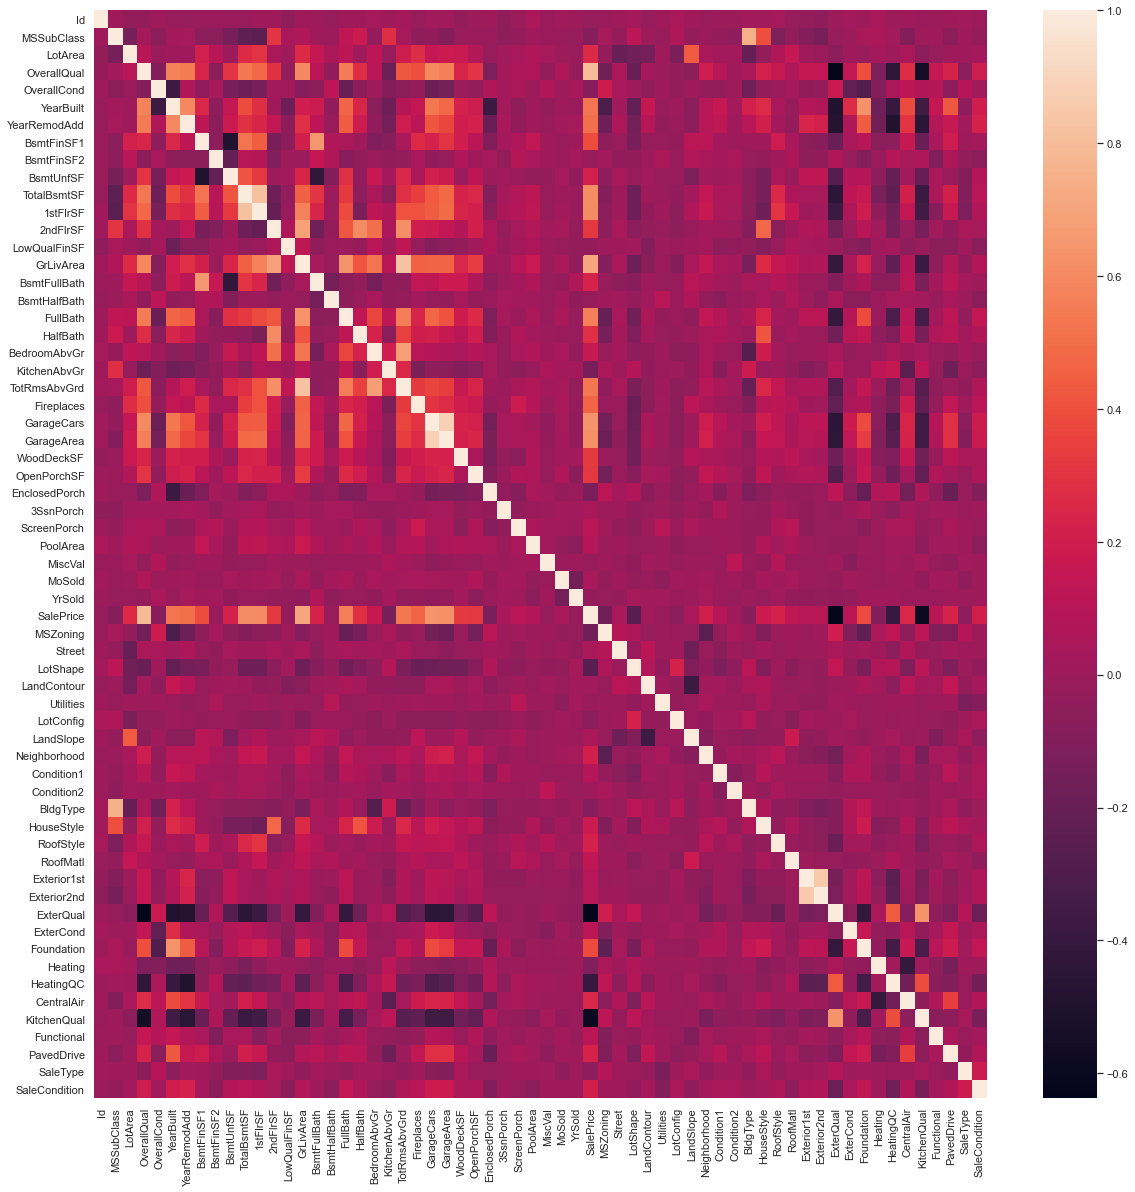

In [73]:
# Since we cant keep exploring all the variables, lets make a heat map and explore the corelation of variables

corrmat = df_concat.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(corrmat)

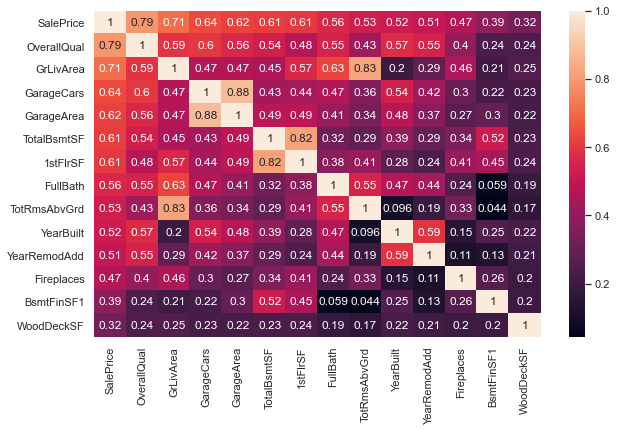

In [74]:
#To focus on the largest corelations
col1 = corrmat.nlargest(15, 'SalePrice')['SalePrice'].index
corrmat1 = train[col1].corr()
plt.subplots(figsize = (10,6))
sns.heatmap(corrmat1, annot=True)
plt.show()
# We choose the largest 13 correlation variables as our new dataset (no missing value)

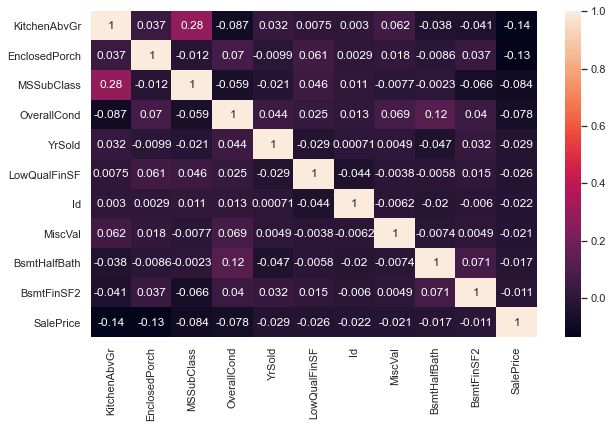

In [75]:
#To focus on 10 the largest negative corelations

col2 = corrmat.nsmallest(20, 'SalePrice')['SalePrice'].index
corrmat2 = pd.concat([train[col2], train['SalePrice']], axis=1).corr()
plt.subplots(figsize = (10,6))
sns.heatmap(corrmat2, annot=True)
plt.show()

In [76]:
#by compare the correlation between the positive and negative correlation, we can conclude those following variable has a better corrlation with the salesprice
# DataPreProcessing for training set
train1 = train.loc[:,['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
'1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','Fireplaces','BsmtFinSF1','WoodDeckSF']]
train1.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF
0,208500,7,1710,2,548,856,856,2,8,2003,2003,0,706,0
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1,978,298
2,223500,7,1786,2,608,920,920,2,6,2001,2002,1,486,0
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1,216,0
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,1,655,192


In [77]:
#double check the missing values
train1.isnull().sum().max()

0

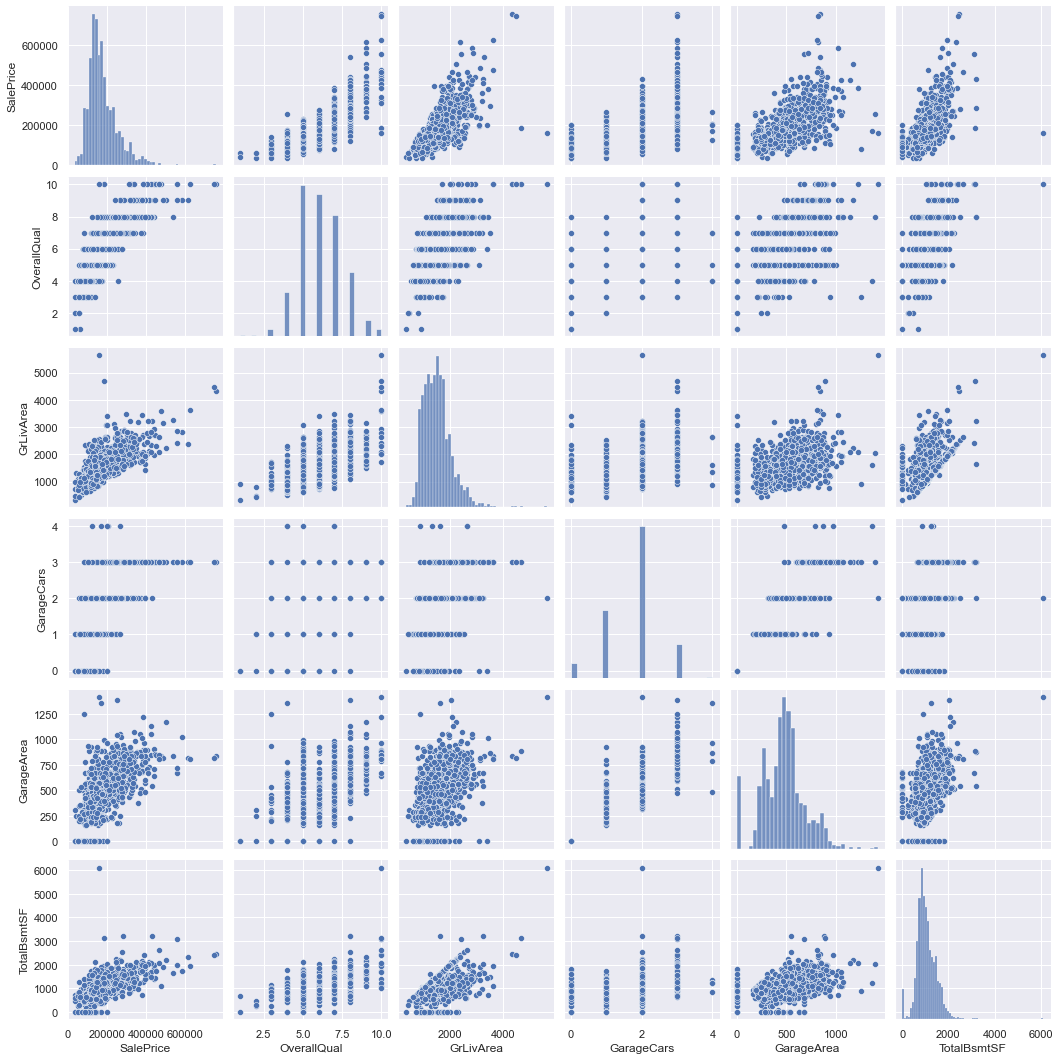

In [78]:
#we can make scatter plot to find the correlation between the 5 most correlated variables
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(train1[cols])

### 2.2 Remove the outlier

In [79]:
# Applying standard scaler to look for outliers 
from sklearn.preprocessing import StandardScaler
scaled_price = StandardScaler().fit_transform(np.array(train1['SalePrice']).reshape(-1,1))
low_range = np.sort(scaled_price, axis = 0)[:10]
high_range = np.sort(scaled_price, axis = 0)[-10:]
print(low_range ,'\n', high_range)

[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]] 
 [[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


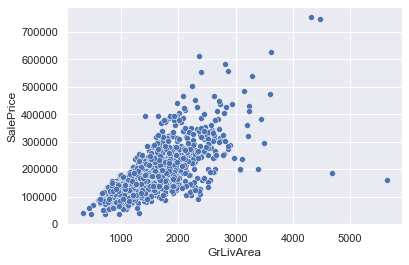

In [80]:
# based on the graph above, we can find there are some obvious outlier showed in the GrLivArea
var = 'GrLivArea'
sns.scatterplot(data = pd.concat([train1[var], train1['SalePrice']], axis = 1), x = var, y = 'SalePrice')
plt.show()

In [81]:
train1.sort_values(by = 'GrLivArea', ascending = False)[:2].index

Int64Index([1298, 523], dtype='int64')

In [82]:
#drop the outlier
train2 = train1.drop([1298, 523])

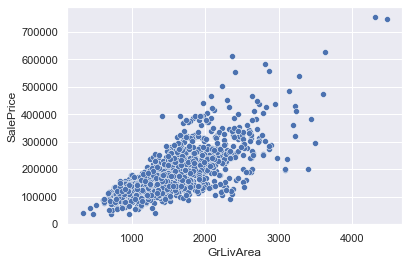

In [83]:
# Visualise without outliers
var = 'GrLivArea'
sns.scatterplot(data = pd.concat([train2[var], train2['SalePrice']], axis = 1), x = var, y = 'SalePrice')
plt.show()

### 2.4 Normalization

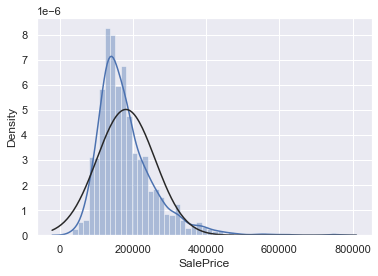

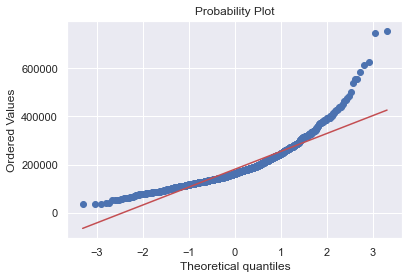

In [84]:
# Histogram and normal probability plot
from scipy.stats import norm
sns.distplot(train2['SalePrice'], fit = norm)
fig = plt.figure()
from scipy import stats
res = stats.probplot(train['SalePrice'], plot = plt)

In [85]:
# Apply log transformation to SalePrice to normalize it
train3 = train2.copy(deep = True)
train3['SalePrice'] = np.log(train1['SalePrice'])
#train4['SalePrice']#

In [86]:
x = train3.drop(['SalePrice'], axis = 1)
y = train3['SalePrice']

In [87]:
x.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF
0,7,1710,2,548,856,856,2,8,2003,2003,0,706,0
1,6,1262,2,460,1262,1262,2,6,1976,1976,1,978,298
2,7,1786,2,608,920,920,2,6,2001,2002,1,486,0
3,7,1717,3,642,756,961,1,7,1915,1970,1,216,0
4,8,2198,3,836,1145,1145,2,9,2000,2000,1,655,192


### 2.5 Create test and validation set

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state= 42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(1312, 13) (146, 13) (1312,) (146,)


## 3. Data Mining

### 3.1 Clustering

In [89]:
# We can see that the scale of the data varies greatly. Therefore normalize it:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
nrm = Normalizer()
nrm.fit(x)
normal_data = nrm.transform(x)

<AxesSubplot:>

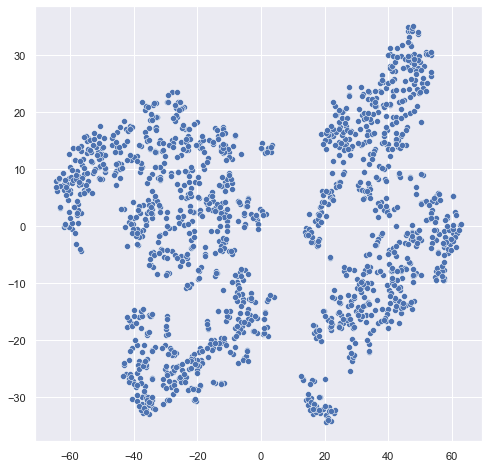

In [90]:
# Apply visualization method - TSNE for clustering our data.
from sklearn.manifold import TSNE
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1])

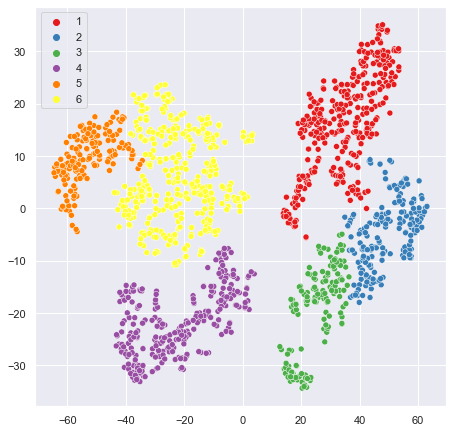

In [91]:
# We got an interesting result! This plot does not look like a noise. Try to cluster the data:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
link = ward(res_tsne)
vb = fcluster(link,t=300, criterion='distance')
fig = plt.figure(figsize=(25,25))
ax2 = fig.add_subplot(3,3,2)
axpl_2 = sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");

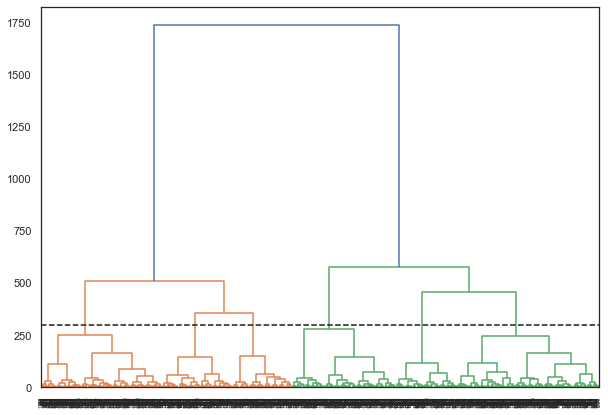

In [92]:
# Hierarchical Clustering : Let's check the quality of clustering with dendrogram:
sns.set(style='white')
plt.figure(figsize=(10,7))
#link = ward(res_tsne)
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [300,300],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

### 3.2 Classification

Evaluating the accuracy on various models

In [93]:
# Model 1 - KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor().fit(x_train, y_train)
y_pred = knn_reg.predict(x_val)

RMSE_score = mean_squared_error(y_val, y_pred, squared = False)
print(RMSE_score)

0.2061709919248283


In [94]:
# Model 2 - Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor().fit(x_train, y_train)
y_pred = forest.predict(x_val)

RMSE_score = mean_squared_error(y_val, y_pred, squared = False)
print(RMSE_score)

0.15172331434023337


In [95]:
# Model 3 - Gaussian Regression
from sklearn.gaussian_process import GaussianProcessRegressor

g_reg = GaussianProcessRegressor().fit(x_train, y_train)
y_pred = g_reg.predict(x_val)

RMSE_score = mean_squared_error(y_val, y_pred, squared = False)
print(RMSE_score)

11.990708806159251


In [96]:
# Model 4 - Catboost Regression 
from catboost import CatBoostRegressor

catb = CatBoostRegressor(iterations=3500,verbose=1000)
catb.fit(x_train, y_train)
y_pred = catb.predict(x_val)

RMSE_score = mean_squared_error(y_val, y_pred, squared = False)
print(RMSE_score)

Learning rate set to 0.015434
0:	learn: 0.3937331	total: 11.7ms	remaining: 41.1s
1000:	learn: 0.0976635	total: 833ms	remaining: 2.08s
2000:	learn: 0.0724647	total: 1.67s	remaining: 1.25s
3000:	learn: 0.0569398	total: 2.48s	remaining: 413ms
3499:	learn: 0.0507448	total: 2.88s	remaining: 0us
0.13301300503118388


In [97]:
# Model 5 - XGBoost Regression 
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=3000, learning_rate=0.005)
xgb_reg.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_val, y_val)],verbose = 100)
y_pred = xgb_reg.predict(x_val)

RMSE_score = mean_squared_error(y_val, y_pred, squared = False)
print(RMSE_score)

[0]	validation_0-rmse:11.46818
[100]	validation_0-rmse:6.95067
[200]	validation_0-rmse:4.21529
[300]	validation_0-rmse:2.55962
[400]	validation_0-rmse:1.55766
[500]	validation_0-rmse:0.95377
[600]	validation_0-rmse:0.58982
[700]	validation_0-rmse:0.37463
[800]	validation_0-rmse:0.25099
[900]	validation_0-rmse:0.18476
[1000]	validation_0-rmse:0.15260
[1100]	validation_0-rmse:0.13802
[1200]	validation_0-rmse:0.13207
[1300]	validation_0-rmse:0.12967
[1349]	validation_0-rmse:0.12916
0.12914432018596997


In [98]:
# Model 6 - SVM Regression
from sklearn import svm

svm_reg = svm.SVR().fit(x_train, y_train)
y_pred = svm_reg.predict(x_val)

RMSE_score = mean_squared_error(y_val, y_pred, squared = False)
print(RMSE_score)

0.17608233685812133


### 3.3 Choosing 4 most accurate models to predict SalePrice

In [99]:
#Creating test data
x_test = test.loc[:,['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
'1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','Fireplaces','BsmtFinSF1','WoodDeckSF']]

In [100]:
x_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
BsmtFinSF1      1
WoodDeckSF      0
dtype: int64

In [101]:
x_test.fillna(value = 0, inplace = True)

In [102]:
# Training on full data for test on 4 most accurate models

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forest1 = RandomForestRegressor().fit(x, y)
y_pred_rf = forest1.predict(x_test)

# XGBoost Regression
xgb_reg = XGBRegressor(n_estimators=1800, learning_rate=0.005)
xgb_reg.fit(x, y, verbose = 1000)
y_pred_xgb = xgb_reg.predict(x_test)

# SVM Regression
svm_reg = svm.SVR().fit(x_train, y_train)
y_pred_SVM = svm_reg.predict(x_test)

# Catboost Regression 
catb = CatBoostRegressor(iterations=3500,verbose=1000)
catb.fit(x_train, y_train)
y_pred_catb = catb.predict(x_test)

Learning rate set to 0.015434
0:	learn: 0.3937331	total: 1.24ms	remaining: 4.33s
1000:	learn: 0.0976635	total: 839ms	remaining: 2.1s
2000:	learn: 0.0724647	total: 1.64s	remaining: 1.23s
3000:	learn: 0.0569398	total: 2.43s	remaining: 404ms
3499:	learn: 0.0507448	total: 2.82s	remaining: 0us


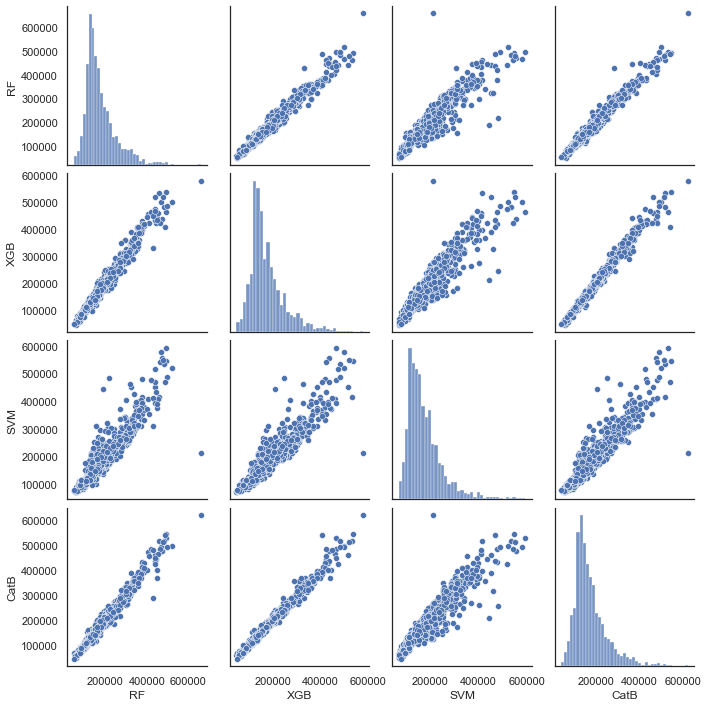

In [103]:
#Combine results of four models and plot
#Converting the sale price back to normal number since we had applied log initially

rf  = np.exp(y_pred_rf) 
xgb = np.exp(y_pred_xgb)
svm = np.exp(y_pred_SVM) 
catb = np.exp(y_pred_catb)

results = pd.DataFrame({'RF': rf,'XGB': xgb, 'SVM':svm, 'CatB':catb}, columns=['RF', 'XGB', 'SVM','CatB'])

sns.pairplot(results)

In [104]:
results.head()

,RF,XGB,SVM,CatB
0,123142.818715,123768.906250,132311.179632,128661.905609
1,144513.229525,157578.796875,166490.087286,154383.295699
2,183464.212652,182261.078125,193478.625458,187945.536751
3,187971.110021,187446.656250,190094.209855,194311.877755
4,200865.232492,188053.828125,166161.433244,184375.149790


In [105]:
#Taking median of the 4 model's results
test['SalePrice'] = np.median(results, axis = 1)

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,126215.405930
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,155981.046287
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,185704.874701
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189032.659938
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,186214.488958


In [106]:
# Export the final prediction
test.to_csv('test_final.csv', index = False)